# Naive Bayes Analysis

## Predicting sex based on actual weight and ideal weight

**Step 1:** Load and clean the data:

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.naive_bayes import GaussianNB


df = pd.read_csv('ideal_weight.csv', usecols=[1,2,3,4])
df.head()

,'sex','actual','ideal','diff'
0,'Male',215,190,25
1,'Female',155,135,20
2,'Male',195,155,40
3,'Female',145,130,15
4,'Female',110,100,10


In [7]:
df = df.rename(columns=lambda x: x.replace('\'',''))
df['sex'] = df['sex'].str.replace('\'','')
df['sex'] = df['sex'].astype('category')
df.head()

,sex,actual,ideal,diff
0,Male,215,190,25
1,Female,155,135,20
2,Male,195,155,40
3,Female,145,130,15
4,Female,110,100,10


**Step 2:** Plot the distribution of the predictive variables:

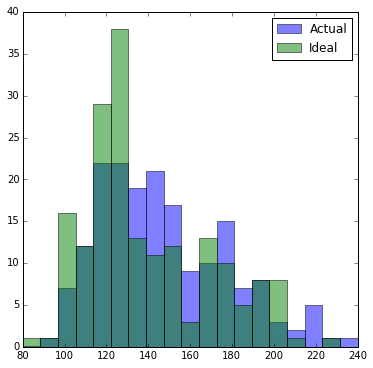

In [8]:
bins = numpy.linspace(80, 240, 20)

plt.figure(figsize=(6,6))
plt.hist(df['actual'], bins, alpha=0.5)
plt.hist(df['ideal'], bins, alpha=0.5)
plt.legend(['Actual','Ideal'])

(array([  0.,   1.,   0.,   0.,   1.,   2.,   0.,   6.,   4.,   2.,   7.,
         29.,  12.,  32.,  41.,  14.,   3.,   9.,   6.,   2.,   2.,   2.,
          1.,   3.,   1.,   0.,   1.,   1.,   0.]),
 array([-40.        , -36.55172414, -33.10344828, -29.65517241,
        -26.20689655, -22.75862069, -19.31034483, -15.86206897,
        -12.4137931 ,  -8.96551724,  -5.51724138,  -2.06896552,
          1.37931034,   4.82758621,   8.27586207,  11.72413793,
         15.17241379,  18.62068966,  22.06896552,  25.51724138,
         28.96551724,  32.4137931 ,  35.86206897,  39.31034483,
         42.75862069,  46.20689655,  49.65517241,  53.10344828,
         56.55172414,  60.        ]),
 <a list of 29 Patch objects>)

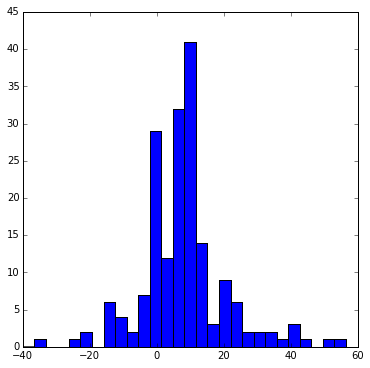

In [9]:
bins = numpy.linspace(-40, 60, 30)
plt.figure(figsize=(6,6))
plt.hist(df['diff'], bins)

**Step 3:** Plot the difference in frequency of females vs males:

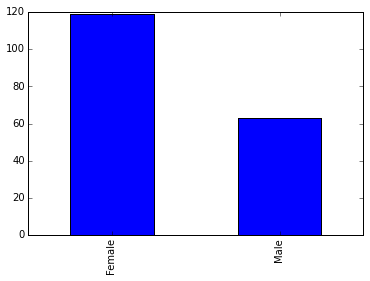

In [10]:
df.sex.value_counts().plot(kind='bar')

**Step 4:** Fit a Gaussian Naive Bayes classifier, measure accuracy, and make two predictions:

In [14]:
X = df[['actual','ideal','diff']]
y = df['sex']

gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
print 'Number of mislabeled points out of a total %d points : %d' % \
       (len(X),(y != y_pred).sum())

Number of mislabeled points out of a total 182 points : 14


In [15]:
print gnb.predict([[145, 160, -15]])

['Male']


In [16]:
print gnb.predict([[160, 145, 15]])

['Female']
